# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print(type( y_test))

# print(train['features'])
print(train['labels'][1])
print(y_valid.shape)

print( y_test.shape)
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

<class 'numpy.ndarray'>
41
(4410,)
(12630,)


In [2]:
# Import class files
import pandas as pd
df_signnames = pd.read_csv('signnames.csv')

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = [X_train.shape[1], X_train.shape[2]]

# TODO: How many unique classes/labels there are in the dataset.

n_classes = df_signnames.shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = [32, 32]
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Speed limit (50km/h)


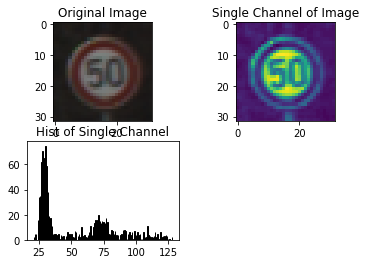

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

import numpy as np
import random

index = random.randint(0, len(X_train))

fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax = fig.add_subplot(131, projection='3d')

# plt_axis_X = np.arange(0, image_shape[0] - 1, 0.25)
# plt_axis_Y = np.arange(0, image_shape[1] - 1, 0.25)

# plt_axis_X, plt_axis_Y = np.meshgrid(plt_axis_X, plt_axis_Y)

# Very first picture in test set
# test_image = X_train[index, :, :, :]
test_image = X_train[index].squeeze()
# # TODO: What's the more efficient/more pythonic way to do that?
# for i in range(3):
#     for x in range(32):
#         for y in range(32):
#             ax.scatter(x, y, test_image[x, y, i] + (i * 256), zdir='z', c='red' if i == 0 else 'green' if i == 1 else 'blue')
            
# plt.imshow(test_image[:, :, 2])
fig.add_subplot(221).set_title('Original Image')
plt.imshow(test_image)
fig.add_subplot(222).set_title("Single Channel of Image")
# TODO: need to update the imshow parameter to show correct image channel color mapping
plt.imshow(test_image[:, :, 2])
# test_image[:, :, 0]
# test_image[:, :, 2]
# TODO: Resolve title overlapping

fig.add_subplot(223).set_title("Hist of Single Channel")
some = plt.hist(test_image[:, :, 0].flatten(), 256, fc='k', ec='k')

# Counting example labels 


print(df_signnames.loc[y_train[index]].SignName)



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

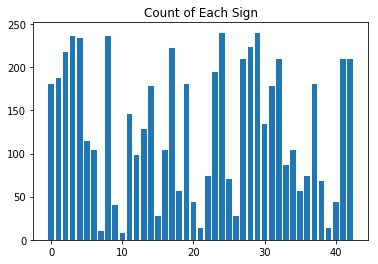

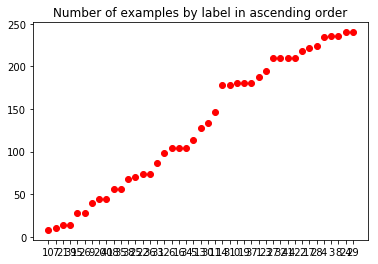

In [6]:
def counting_by_labels(labels):
    count = np.zeros(shape=(n_classes), dtype=np.uint8)
    for i in range(0, len(labels)):
        count[labels[i]]+=1
    return count

# Counting data 
# count = np.ndarray(shape=(n_classes, 1), dtype=np.uint8)
y_dict_count = counting_by_labels(y_train)

# Visualize data labels
plt.figure()

x = np.arange(0, n_classes)
y = y_dict_count
# y = np.sin(x)
plt.bar(x, y)
plt.title("Count of Each Sign")

# Sort a python dictionary by value
# http://stackoverflow.com/questions/613183/sort-a-python-dictionary-by-value
import operator
x_dict = dict(enumerate(y_dict_count.tolist()))
sorted_x = sorted(x_dict.items(), key=operator.itemgetter(1))

sorted_x = np.asarray(sorted_x)
fig3 = plt.figure()
# plt.plot(res[:, 1], res[:, 0], 'ro')
x = np.arange(0, len(sorted_x[:, 0]))
plt.xticks(x, sorted_x[:, 0])
plt.plot(x, sorted_x[:, 1], 'ro')
plt.title("Number of examples by label in ascending order")



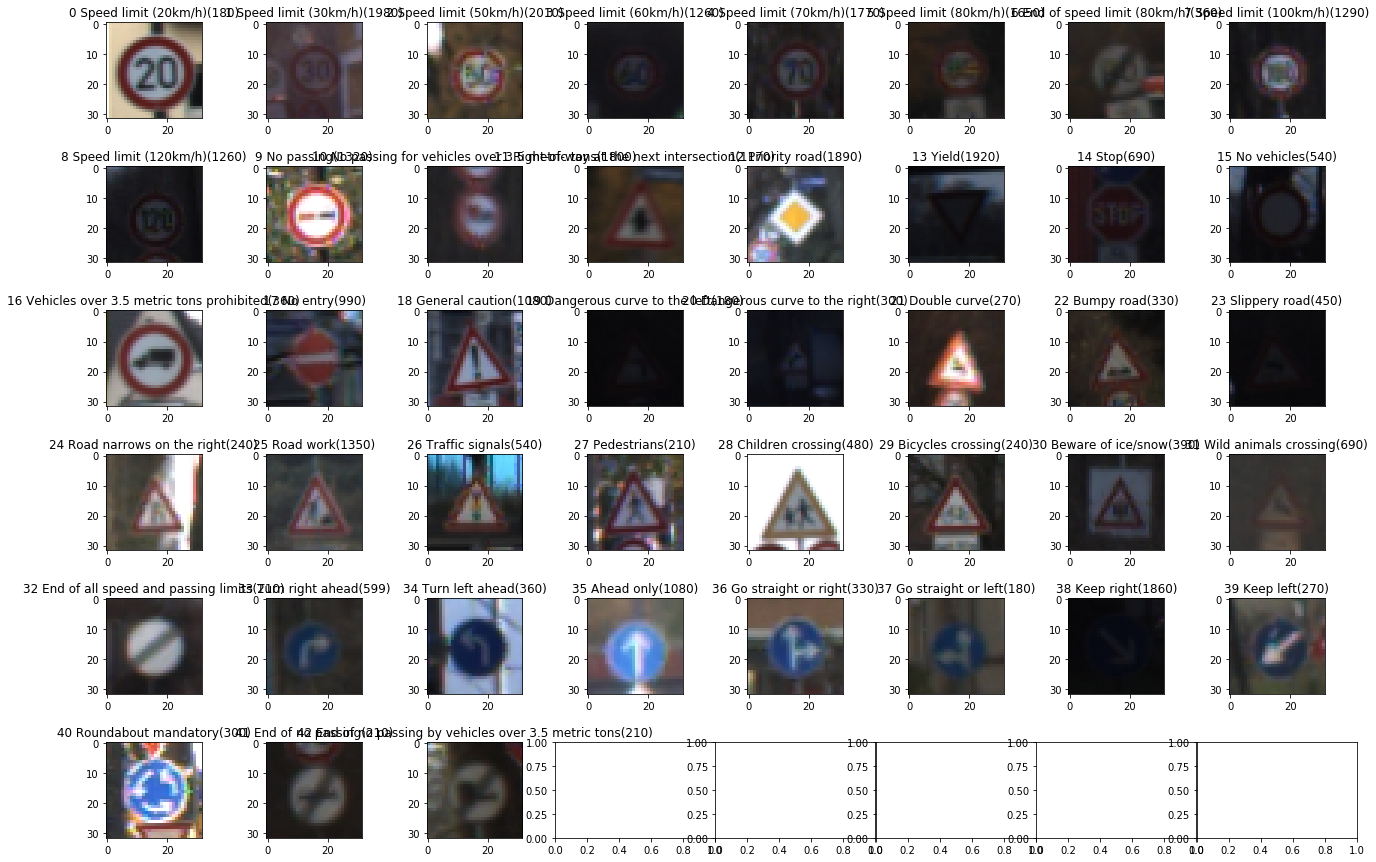

In [7]:
# Category data_id by labels
from collections import defaultdict
ids_by_labels = defaultdict(list)

# defaultdict（<type 'list'>, {labels: ['id_0', 'id_1', ...]}）
id_by_labels = defaultdict(list)
for count, elem in enumerate(y_train):
    id_by_labels[elem].append(count)

# Plot pictures in array
plt.figure()
fig4, axs = plt.subplots(6,8, figsize=(23, 15), facecolor='w', edgecolor='k')
fig4.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()


for i in range(len(id_by_labels)):
    idx = id_by_labels[i][0]
    axs[i].set_title(str(i) + " " + df_signnames.loc[y_train[idx]].SignName + "(" + str(len(id_by_labels[i])) + ")")
    axs[i].imshow(np.asarray(X_train[idx], dtype=np.uint8))

X_train_sorted = X_train
y_train_sorted = y_train

def get_list_from_id_by_labels(num_of_labels):
    range_list = []
    for i in range(num_of_labels):
        for j in range(len(id_by_labels[i])):
            range_list.append(id_by_labels[i][j])
    return range_list

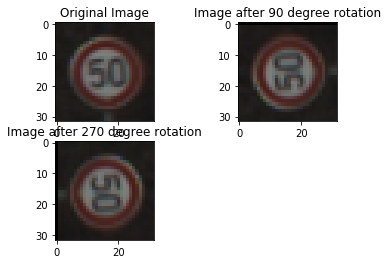

In [8]:
import cv2
def rotate_by_deg(img_in, deg):
    rows, cols, depth = img_in.shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), deg, 1)
    return cv2.warpAffine(test_image, M, (cols, rows))

# augment_by_rotation(X_train)
fig2 = plt.figure()
fig2.add_subplot(221).set_title('Original Image')
plt.imshow(test_image)
fig2.add_subplot(222).set_title("Image after 90 degree rotation")
plt.imshow(rotate_by_deg(test_image, 90))
fig2.add_subplot(223).set_title("Image after 270 degree rotation")
plt.imshow(rotate_by_deg(test_image, 270))

# print(rotate_by_deg(test_image, 270).shape)

# Generate augmentated data
def augment_by_rotation(data, deg, data_range):
#     aug_data = np.ndarray(shape=(len(data_range), image.shape[0], image.shape[1], 3))
    aug_data = np.ndarray(shape=(len(data_range), data.shape[1], data.shape[2], 3))
#     for i in range(len(data)):
    j = 0
    for i in data_range:
        aug_data[j, :, :, :] = rotate_by_deg(data[i, :, :, :], deg)
        j+=1
    return aug_data


def augment_labels_by_ids(y_label, data_range):
    aug_data = np.ndarray(shape=(len(data_range)))
    j = 0
    for i in data_range:
        aug_data[j] = y_label[i]
        j+=1
    return aug_data
#---------------------------------------------------------------------------------------
# Data augmentation
#---------------------------------------------------------------------------------------
AUGMENT = 1
if AUGMENT:
# Only augment data for samples less than certain number
# Eg. 15 out of 43
    num_of_labels = 5
# If number of examples is less than num_of_labels then augment the data set
# Pick up first num_of_labels sorted_x[:, 0] (ascending order)
# X_train_rotate_90 = augment_by_rotation(X_train, deg=90, sorted_x[:, 0][0: num_of_labels])
    range_list = get_list_from_id_by_labels(num_of_labels)
    X_train_rotate_45 = augment_by_rotation(X_train, 45, range_list)
    y_train_rotate_45 = augment_labels_by_ids(y_train, range_list)
#---------------------------------------------------------------------------------------
# Aligning augmented train data and labels
#---------------------------------------------------------------------------------------
# print(y_train.shape)
# print(y_train_rotate_90.shape)
    X_train = np.append(X_train, X_train_rotate_45, axis=0)
    y_train = np.append(y_train, y_train_rotate_45, axis=0)

assert(len(X_train) == len(y_train))

In [9]:
# Redraw distribution

In [10]:
# How to make a 2d numpy array a 3D array
# http://stackoverflow.com/questions/7372316/how-to-make-a-2d-numpy-array-a-3d-array
# [:, :] -> [:, :, 1]

In [11]:
# Try grayscaling first
CHANNEL = 3
NORMALIZE = 1

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# shuffle the training data
from sklearn.utils import shuffle

def img_to_grayscale(img_tensor):
    img_tensor_gray = np.ndarray(shape=(len(img_tensor), 32, 32, 1), dtype=np.uint8)
    for i in range(0, len(img_tensor)):
#   http://stackoverflow.com/questions/7372316/how-to-make-a-2d-numpy-array-a-3d-array
        img_tensor_gray[i, :, :, :] = grayscale(img_tensor[i, :, :, :].astype(np.uint8))[:, :, np.newaxis]
    return img_tensor_gray

def normalize(img_tensor):
    img_normalized = np.ndarray(shape=(len(img_tensor), 32, 32, CHANNEL), dtype=np.float16)
    for i in range(0, len(img_tensor)):
        img_normalized[i, :, :, :] = (img_tensor[i, :, :, :] - 128.)/128
#         How to do type conversion correctly?
    img_normalized.astype('uint8')
    return img_normalized

#---------------------------------------------------------------------------------------
# Preprocessing
#---------------------------------------------------------------------------------------
# Grayscaling

if CHANNEL == 1:
    X_train = img_to_grayscale(X_train)
    X_valid = img_to_grayscale(X_valid)
    X_test = img_to_grayscale(X_test)

if NORMALIZE:
    X_train = normalize(X_train)
    X_valid = normalize(X_valid)
    X_test = normalize(X_test)

# print(X_train.shape)
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [12]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [17]:
# Setup TensorFlow
import tensorflow as tf

# TODO: hyperparameters to be tuned
EPOCHS = 50
BATCH_SIZE = 128

DROPOUT = 1
KEEP_PROB = 0.5


from tensorflow.contrib.layers import flatten
# TODO: Estimate potential memory usage

#---------------------------------------------------------------------------------------
# Wrappers
#---------------------------------------------------------------------------------------
# TODO: automatic calculate next layer shape
def Conv2d_layer(x, shape, strides, mean, stddev, padding):
    conv_w = tf.Variable(tf.truncated_normal(shape, mean=mean, stddev=stddev))
    dim_b = shape[3]
    conv_b = tf.Variable(tf.zeros(dim_b))
    return tf.nn.conv2d(x, conv_w, strides, padding=padding) + conv_b

# TODO: makes below two functions configurable
# Passing callback
#     TODO: other activation function
# Input: hidden layer
def Rectifier(conv):
    return tf.nn.relu(conv)

#---------------------------------------------------------------------------------------
# Dropout
#---------------------------------------------------------------------------------------
if DROPOUT:
    keep_prob = tf.placeholder(tf.float32)
    
def dropout(conv):
    return tf.nn.dropout(conv, keep_prob)
# 
# Applying max pooling for now, try other pooling later
def Pooling(conv, ksize, strides, padding):
    return tf.nn.max_pool(conv, ksize=ksize, strides=strides, padding=padding)

# 4d to 2d
def Connect_layer(fc_in, shape, mean, stddev, padding):
    fc_w = tf.Variable(tf.truncated_normal(shape=shape, mean = mean, stddev=stddev))
    dim_b = shape[1]
    fc_b = tf.Variable(tf.zeros(dim_b))
#     y = xW + b
    return tf.matmul(fc_in, fc_w) + fc_b

#---------------------------------------------------------------------------------------
# LeNet-5 Architecture
#---------------------------------------------------------------------------------------
# Starting with single channel grayscale image
def LeNet(x, input_shape):
#     TODO: Change?
    mu = 0
    sigma = 0.1
#     Layer 1: Convolutional. Input = 32x32xCHANNEL. Output = 28x28x6
    conv1 = Conv2d_layer(x, shape=(input_shape[0], input_shape[1], CHANNEL, 6), strides=[1, 1, 1, 1], mean=mu, stddev=sigma, padding='VALID')
    output_conv1 = conv1
    print(tf.shape(conv1))
#     Activation
    conv1 = Rectifier(conv1)
    if DROPOUT:
        conv1 = dropout(conv1)
        
#     Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = Pooling(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
#     Layer 2: Convolutional. Output = 10x10x16
    conv2 = Conv2d_layer(conv1, shape=(5, 5, 6, 16), strides=[1, 1, 1, 1], mean=mu, stddev=sigma, padding='VALID')
#     Activation
#     conv2 = tf.nn.relu(conv2)
    conv2 = Rectifier(conv2)
    
    output_conv2 = conv2
    if DROPOUT:
        conv2 = dropout(conv2)    
#     Pooling. Input = 14x14x16. Output = 5x5x16.
    conv2 = Pooling(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    
#     Flatten. Input = 5x5x16. Output = 400
    fc0 = flatten(conv2)
#     2D

#     Layer 3: Fully Connected. Input = 400. Output = 120
    fc1 = Connect_layer(fc0, shape=(400, 120), mean=mu, stddev=sigma, padding='VALID')
#     Activation
    fc1 = Rectifier(fc1)
    output_fc1 = fc1
    
    if DROPOUT:
        fc1 = dropout(fc1)
    
#     Layer 4: Fully Connected. Input 120. Output = 84
    fc2 = Connect_layer(fc1, shape=(120, 84), mean=mu, stddev=sigma, padding='VALID')
#     Activation
    fc2 = Rectifier(fc2)
    if DROPOUT:
        conv1 = dropout(conv1)

#     Layer 5: Fully Connected. Input 84. Output = n_classes
    fc3 = Connect_layer(fc2, shape=(84, n_classes), mean=mu, stddev=sigma, padding='VALID')
    logits = fc3
    
    return logits, output_conv1, output_conv2, output_fc1

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [19]:
# Placeholder for a batch of input images
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], CHANNEL))
y = tf.placeholder(tf.int32, (None))
# TODO: Other labels?
one_hot_y = tf.one_hot(y, n_classes)

In [20]:
# Training Pipeline
# Used to remove duplicated nodes when re-run the same nodes in Jupyter
# tf.reset_default_graph()
rate = 0.0005

figFeature = plt.figure()

input_channel_shape = [5, 5]
logits = LeNet(x, input_channel_shape)[0]
output_conv1 = LeNet(x, input_channel_shape)[1]
output_conv2 = LeNet(x, input_channel_shape)[2]
output_fc1 = LeNet(x, input_channel_shape)[3]

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
# Similar to Statistical Gradient Descent (SGD)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

Tensor("Shape:0", shape=(4,), dtype=int32)
Tensor("Shape_1:0", shape=(4,), dtype=int32)
Tensor("Shape_2:0", shape=(4,), dtype=int32)
Tensor("Shape_3:0", shape=(4,), dtype=int32)


In [ ]:
# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(correct_prediction)
print(accuracy_operation)

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        if DROPOUT:
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        else:
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
# Train the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            if DROPOUT:
                batch_accuracy = sess.run(training_operation, feed_dict={x:batch_x, y:batch_y, keep_prob: KEEP_PROB})
            else:
                batch_accuracy = sess.run(training_operation, feed_dict={x:batch_x, y:batch_y})
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {}...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './lenet5_traffic_sign')
    print("Model saved")

In [ ]:
# Training accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    training_accuracy = evaluate(X_train, y_train)
    print("Training Accuracy = {:.3f}".format(training_accuracy))

In [ ]:
# # Evaluate The model
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# import cv2
# import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
# %matplotlib inline
# import numpy as np

import matplotlib.image as mpimg

filenames = ['50.jpg',
             'curve.jpg',
             'keep_right.jpg',
             'stop.jpg',
             'yield.jpg']
base_path = 'pack/'
#---------------------------------------------------------------------------------------
# Preprocessing
#---------------------------------------------------------------------------------------
def preprocessor(f_names, base_path):
    new_files = []
    
    for i in range(len(f_names)):
        new_files.append(base_path + f_names[i])

    # is color
    img_list = []
    for i in range(len(new_files)):
        img_list.append(mpimg.imread(new_files[i], 1))

    img_resized_list = []
    for i in range(len(new_files)):
        img_resized_list.append(cv2.resize(img_list[i], (32, 32), interpolation=cv2.INTER_CUBIC))  
        
    return np.asarray(img_resized_list), new_files

#---------------------------------------------------------------------------------------
# Setting up input test data captured from web
#---------------------------------------------------------------------------------------

X_test_online, new_files = preprocessor(filenames, base_path)
y_test_online = [3, 19, 38, 14, 13]
y_test_online = np.asarray(y_test_online, dtype=np.uint8)
#---------------------------------------------------------------------------------------
# Ploting test images
#---------------------------------------------------------------------------------------

# print(X_test_online)
plt.figure()
fig5, axs1 = plt.subplots(1,5, figsize=(23, 15), facecolor='w', edgecolor='k')
fig5.subplots_adjust(hspace = .5, wspace=.001)
axs1 = axs1.ravel()

for i in range(len(X_test_online)):
#     axs1[i].imshow(np.asarray(X_test_online[i], dtype=np.uint8))
#     axs1[i].imshow(X_test_online[i])
    axs1[i].imshow(mpimg.imread(new_files[i], 1))

#---------------------------------------------------------------------------------------
# Preprocessing
#---------------------------------------------------------------------------------------
if CHANNEL == 1:
    X_test_online = img_to_grayscale(X_test_online)
if NORMALIZE:
    X_test_online = normalize(X_test_online)

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed

def evaluate_with_batch(X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    y_pred = []
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + batch_size
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        print(batch_x.shape)
        print(batch_y[2])
        if DROPOUT:
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        else:
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
            total_accuracy += accuracy
    return accuracy


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate_with_batch(X_test_online, y_test_online, batch_size = 5)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    
# with boolean output
def evaluate_with_batch(X_data, y_data, batch_size):
    num_examples = len(X_data)
    total_accuracy = 0
    y_pred = []
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + batch_size
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        if DROPOUT:
            res = sess.run(correct_prediction, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        else:
            res = sess.run(correct_prediction, feed_dict={x: batch_x, y: batch_y})
#         print("Prediction result", res)
        y_pred.append(res)
    return y_pred

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    output = evaluate_with_batch(X_test_online, y_test_online, batch_size = 5)
    print(output)

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
# Test accuracy 40 percent
# Correctly predict 3th and 4th input image
print("Test Accuracy = {:.3f}".format(test_accuracy))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [ ]:
#Using top five
saver = tf.train.Saver()

pred = tf.argmax(logits, 1)

pred_softmax = tf.nn.softmax(logits)
pred_top_five, pred_top_five_indices = tf.nn.top_k(pred_softmax, k=5, sorted=True)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("Restore recent model")
    res_pred, res_top_five, res_top_five_indices = sess.run([pred, pred_top_five, pred_top_five_indices], feed_dict={x: X_test_online, y: y_test_online, keep_prob: 1.0})
# print(res_pred)
# print(y_test_online)
# print(res_top_five)
# print(res_top_five_indices)


In [ ]:
# print
# Display predict result
print("Actual vs Prediction")
for i in range(len(y_test_online)):
    fig = plt.figure()
    fig.add_subplot(121).set_title(filenames[i])
    plt.imshow(mpimg.imread(new_files[i], 1))
    
#     image from training set
    training_label_id = res_pred[i]
    idx = id_by_labels[training_label_id][0]
#     idx = id_by_labels[training_label_id][10]
    fig.add_subplot(122).set_title(df_signnames.loc[y_train_sorted[idx]].SignName)
    plt.imshow(X_train_sorted[idx])

In [ ]:
# Predictions
# print(res_pred)
# print(y_test_online)
print(res_top_five)
print(res_top_five_indices)

for row in range(len(res_top_five_indices)):
    print(":", row)
    for i in range(len(res_top_five_indices[row])):
        label_index = res_top_five_indices[row][i]
        idx = id_by_labels[label_index][0]
        print(res_top_five[row][i])
        print(df_signnames.loc[y_train_sorted[idx]].SignName)


For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
# ### Visualize your network's feature maps here.
# ### Feel free to use as many code cells as needed.

# # image_input: the test image being fed into the network to produce the feature maps
# # tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# # activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# # plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

# def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
#     # Here make sure to preprocess your image_input in a way your network expects
#     # with size, normalization, ect if needed
#     # image_input =
#     # Note: x should be the same name as your network's tensorflow data placeholder variable
#     # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
# #     activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
#     activation = tf_activation.eval(feed_dict={x : image_input, keep_prob: KEEP_PROB})
#     featuremaps = activation.shape[3]
#     print(featuremaps.shape)
#     plt.figure(plt_num, figsize=(15,15))
#     for featuremap in range(featuremaps):
#         plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
#         plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
#         if activation_min != -1 & activation_max != -1:
#             plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
#         elif activation_max != -1:
#             plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
#         elif activation_min !=-1:
#             plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
#         else:
#             plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
def outputFeatureMap(image_input, tf_activation):
    activation = tf_activation.eval(feed_dict={x:image_input, keep_prob: KEEP_PROB})
    featuremaps = activation.shape[3]
    # print(featuremaps)
    plt_num = 1
    activation_min = -1
    activation_max = 1
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
    #     plt.subplots_adjust(hspace = 1.9)
    #     plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        plt.title('FMap' + str(featuremap))
        plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")

In [ ]:
# X_test_online = preprocessor(filenames, base_path)[0]
    
# print(X_test_online.shape)
# if CHANNEL == 1:
#     X_test_online = img_to_grayscale(X_test_online)
    
# if NORMALIZE:
#     X_test_online = normalize(X_test_online)

# with tf.Session() as sess:
#     saver.restore(sess, tf.train.latest_checkpoint('.'))
# #     outputFeatureMap(X_test_online, x)
#     outputFeatureMap(X_train, x)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    num_examples = len(X_train)
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            if DROPOUT:
                batch_accuracy = sess.run(training_operation, feed_dict={x:batch_x, y:batch_y, keep_prob: KEEP_PROB})
            else:
                batch_accuracy = sess.run(training_operation, feed_dict={x:batch_x, y:batch_y})
#             activation = conv2.eval(feed_dict={x:batch_x, y:batch_y, keep_prob: KEEP_PROB})
        if i == EPOCHS - 1:
            outputFeatureMap(batch_x, output_conv1)
        print("EPOCH {}...".format(i+1))
#         print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './lenet5_traffic_sign')
    print("Model saved")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images

Unfortunately, don't have chance to really explore interesting implications of feature maps of hidden layers. They really open the doors for us to take a closer look at how neural networks deconstruct images layer by layer. Under different channels, the network seems picking up differnt features. Multiple input layer filter sizes are used to observe feature maps variations.

I would need to perform more controlled experiments to describe how these information could be used to fine tune or restructure network parameter and architecture.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 